<a href="https://colab.research.google.com/github/mirnanoukari/Pose-Estimation/blob/main/Pose_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image Labeling

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os

keypoints_2d = np.array([[603.39123535, 301.11212158],
 [640.75494385, 396.78601074],
 [556.61352539, 291.11450195],
 [697.81604004, 276.12750244]])


# Creating a VideoCapture object to read the video
cap = cv2.VideoCapture('iiwa.mp4')
count = 0
x1, x2, x3, x4 = 10, 20, 30, 40
y1, y2, y3, y4 = 10, 20, 30 ,40
keypoints = [cv2.KeyPoint(x1, y1, 1), cv2.KeyPoint(x2, y2, 1), cv2.KeyPoint(x3, y3, 1), cv2.KeyPoint(x4, y4, 1)]

# Loop until the end of the video
while (cap.isOpened()):
	# Capture frame-by-frame
	ret, frame = cap.read()
	frame = cv2.resize(frame, (540, 380), fx = 0, fy = 0,
						interpolation = cv2.INTER_CUBIC)
  
	#cv2_imshow(frame)
	path = '/content/images'
	cv2.imwrite(os.path.join(path , "frame%d.jpg" % count), frame)
	count+=1
	gaussianblur = cv2.GaussianBlur(frame, (5, 5), 0)
 
	orb = cv2.ORB_create(40)
	kp = orb.detect(frame,None)

	kp, des = orb.compute(frame, kp)
 
	img = cv2.drawKeypoints(frame, kp, None, color=(0,255,0), flags=0)

 
	plt.imshow(img), plt.show()

	

# release the video capture object
cap.release()

In [ ]:
!zip -r /content/images.zip /content/images

	zip warning: name not matched: /content/images

zip error: Nothing to do! (try: zip -r /content/images.zip . -i /content/images)


In [ ]:
# from google.colab import files
# files.download("/content/images.zip")

In [ ]:
import json
import os
import cv2
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
!unzip /content/Keypoints.v2i.yolov5pytorch.zip

Archive:  /content/Keypoints.v2i.yolov5pytorch.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/frame0_jpg.rf.92bec8f450c3c977d6094c5af03d5586.jpg  
 extracting: test/images/frame100_jpg.rf.3d1b3d657cb6a233744162811f092623.jpg  
 extracting: test/images/frame111_jpg.rf.aac5c9efea1250bf86c8121a62614a48.jpg  
 extracting: test/images/frame113_jpg.rf.bc842acb30d6dcb9f5a3b1787cf16b3f.jpg  
 extracting: test/images/frame11_jpg.rf.22a84c423cd4c2271c3c2ffe5de0bf0d.jpg  
 extracting: test/images/frame125_jpg.rf.7ae5622dac1e114aa61dd788b3ee8f8b.jpg  
 extracting: test/images/frame137_jpg.rf.8baab4bddbfe143a3569d506e5d04079.jpg  
 extracting: test/images/frame244_jpg.rf.a423472f5899df6aeb5c9db6a506613f.jpg  
 extracting: test/images/frame250_jpg.rf.f1c2e7b24e4ba071b1533bdc932449b9.jpg  
 extracting: test/images/frame296_jpg.rf.1b0866f87fb7b822e2ac0761b8f623d1

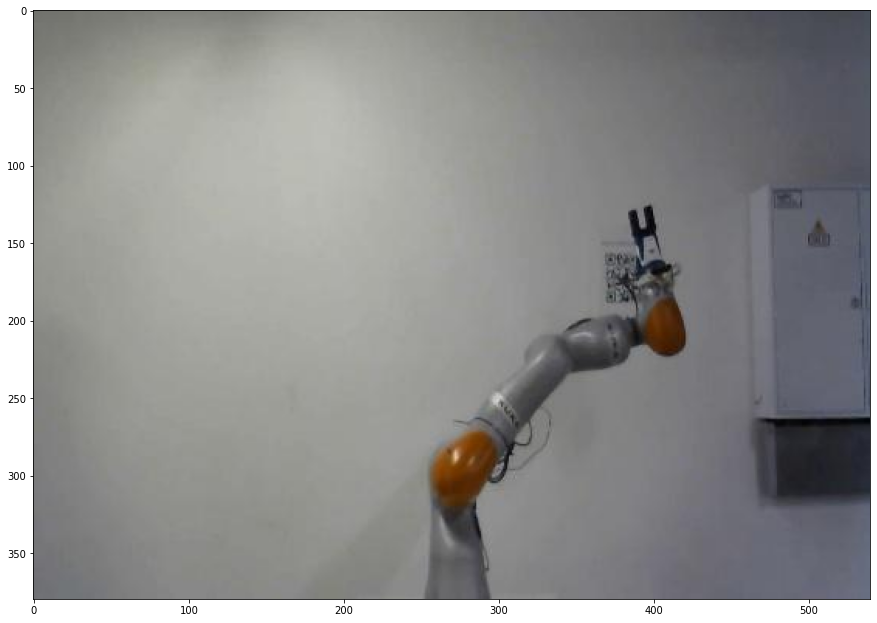

In [ ]:
file_image_example = '/content/train/images/frame35_jpg.rf.36a4f3fc691f92d2eccb7de46f8dc2ca.jpg'

img = cv2.imread(file_image_example)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15,15))
plt.imshow(img)

In [ ]:
file_labels_example = '/content/train/labels/frame35_jpg.rf.36a4f3fc691f92d2eccb7de46f8dc2ca.txt'

with open(file_labels_example) as f:
    lines_txt = f.readlines()
    lines = []
    for line in lines_txt:
        lines.append([int(line.split()[0])] + [round(float(el), 7) for el in line.split()[1:]])

for idx, line in enumerate(lines):
    print("Rectangle {}:".format(idx+1), line)

Rectangle 1: [1, 0.5136667, 0.7798421, 0.0779074, 0.1315526]
Rectangle 2: [2, 0.4874444, 0.8225526, 0.0089815, 0.0132895]
Rectangle 3: [0, 0.5408519, 0.7217368, 0.0073704, 0.009]
Rectangle 4: [1, 0.755037, 0.5387105, 0.0518704, 0.1002368]
Rectangle 5: [0, 0.755037, 0.4957895, 0.0077222, 0.0094737]
Rectangle 6: [2, 0.7646111, 0.5799474, 0.0078704, 0.0092368]


In [ ]:
keypoint_names = ['head', 'tail']

# Dictionary to convert rectangles classes into keypoint classes because keypoint classes should start with 0
rectangles2keypoints = {0:0, 2:1}

def converter(file_labels, file_image, keypoint_names):

    img = cv2.imread(file_image)
    img_w, img_h = img.shape[1], img.shape[0]
    
    with open(file_labels) as f:
        lines_txt = f.readlines()
        lines = []
        for line in lines_txt:
            lines.append([int(line.split()[0])] + [round(float(el), 5) for el in line.split()[1:]])
    bboxes = []
    keypoints = []

    # In this loop we convert normalized coordinates to absolute coordinates
    for line in lines:
        # Number 2 is a class of rectangles related to bounding boxes.
        if line[0] == 1:
            x_c, y_c, w, h = round(line[1] * img_w), round(line[2] * img_h), round(line[3] * img_w), round(line[4] * img_h)
            bboxes.append([round(x_c - w/2), round(y_c - h/2), round(x_c + w/2), round(y_c + h/2)])
        # Other numbers are the classes of rectangles related to keypoints.
        # After convertion, numbers of keypoint classes should start with 0, so we apply rectangles2keypoints dictionary to achieve that.
        # In our case:
        # 1 is rectangle for head keypoint, which is 0, so we convert 1 to 0;
        # 2 is rectangle for tail keypoint, which is 1, so we convert 2 to 1.
        else:
            kp_id, x_c, y_c = rectangles2keypoints[line[0]], round(line[1] * img_w), round(line[2] * img_h)
            keypoints.append([kp_id, x_c, y_c])
    #print(keypoints)
    # In this loop we are iterating over each keypoint and looking to which bounding box it matches.
    # Thus, we are matching keypoints and corresponding bounding boxes.
    keypoints_sorted = [[[] for _ in keypoint_names] for _ in bboxes]

    for kp in keypoints:
        kp_id, kp_x, kp_y = kp[0], kp[1], kp[2]
        #print(kp[2])
        for bbox_idx, bbox in enumerate(bboxes):
            x1, y1, x2, y2 = bbox[0], bbox[1], bbox[2], bbox[3]
            #print('x1', x1, 'kp_x', kp_x, 'x_2', x2)
            #print('y1', y1, 'kp_y', kp_y, 'y_2', y2)
            #print("")

            if x1 < kp_x < x2 and y1 < kp_y < y2:
                keypoints_sorted[bbox_idx][kp_id] = [kp_x, kp_y, 1] # All keypoints are visible
                #print(keypoints_sorted[bbox_idx][kp_id])
    return bboxes, keypoints_sorted


In [ ]:
bboxes, keypoints_sorted = converter(file_labels_example, file_image_example, keypoint_names)

print("Bboxes:", bboxes)
print("Keypoints:", keypoints_sorted)

Bboxes: [[256, 271, 298, 321], [394, 186, 422, 224]]
Keypoints: [[[292, 274, 1], [263, 313, 1]], [[408, 188, 1], [413, 220, 1]]]


[292, 274, 1]
[263, 313, 1]
[408, 188, 1]
[413, 220, 1]


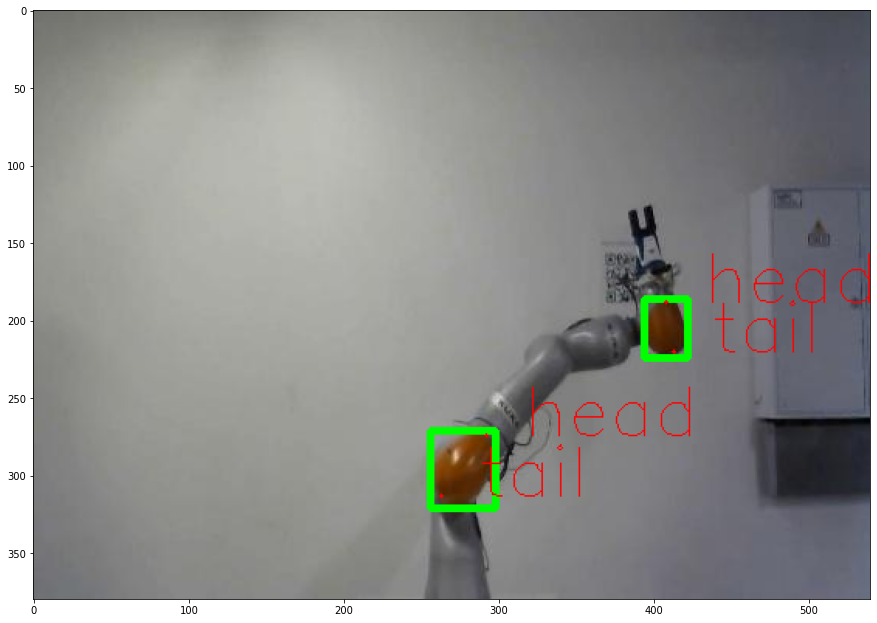

In [ ]:
for bbox_idx, bbox in enumerate(bboxes):
    top_left_corner, bottom_right_corner = tuple([bbox[0], bbox[1]]), tuple([bbox[2], bbox[3]])
    img = cv2.rectangle(img, top_left_corner, bottom_right_corner, (0,255,0), 3)
    
    for kp_idx, kp in enumerate(keypoints_sorted[bbox_idx]):
        print(kp)
        center = tuple([kp[0], kp[1]])
        img = cv2.circle(img, center, 1, (255,0,0), -5)
        img = cv2.putText(img, " " + keypoint_names[kp_idx], center, cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,0,0), 1)
        
plt.figure(figsize=(15,15))
plt.imshow(img)

In [ ]:
def dump2json(bboxes, keypoints_sorted, file_json):
    annotations = {}
    annotations['bboxes'], annotations['keypoints'] = bboxes, keypoints_sorted
    with open(file_json, "w") as f:
        json.dump(annotations, f)

In [ ]:
import os
import shutil

IMAGES_TRAIN = '/content/train/images'
LABELS_TRAIN = '/content/train/labels'
ANNOTATIONS_TRAIN = '/content/train/annotations'

IMAGES_TEST = '/content/test/images'
LABELS_TEST = '/content/test/labels'
ANNOTATIONS_TEST = '/content/test/annotations'

if not os.path.isdir(ANNOTATIONS_TRAIN):
  os.mkdir(ANNOTATIONS_TRAIN)
else:
  shutil.rmtree(ANNOTATIONS_TRAIN)
  os.mkdir(ANNOTATIONS_TRAIN)
if not os.path.isdir(ANNOTATIONS_TEST):
  os.mkdir(ANNOTATIONS_TEST)
else:
  shutil.rmtree(ANNOTATIONS_TEST)
  os.mkdir(ANNOTATIONS_TEST)


files_names_train = [file.split('.jpg')[0] for file in os.listdir(IMAGES_TRAIN)]

for file in files_names_train:
    file_labels = os.path.join(LABELS_TRAIN, file + ".txt")
    file_image = os.path.join(IMAGES_TRAIN, file + ".jpg")
    bboxes, keypoints_sorted = converter(file_labels, file_image, keypoint_names)
    dump2json(bboxes, keypoints_sorted, os.path.join(ANNOTATIONS_TRAIN, file + '.json'))

files_names_test = [file.split('.jpg')[0] for file in os.listdir(IMAGES_TEST)]

for file in files_names_test:
    file_labels = os.path.join(LABELS_TEST, file + ".txt")
    file_image = os.path.join(IMAGES_TEST, file + ".jpg")
    bboxes, keypoints_sorted = converter(file_labels, file_image, keypoint_names)
    dump2json(bboxes, keypoints_sorted, os.path.join(ANNOTATIONS_TEST, file + '.json'))

# Training

In [ ]:
import os, json, cv2, numpy as np, matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset, DataLoader

import torchvision
from torchvision.models.detection.rpn import AnchorGenerator
from torchvision.transforms import functional as F

import albumentations as A 

In [ ]:
def train_transform():
    return A.Compose([
        A.Sequential([
            A.RandomRotate90(p=1), # Random rotation of an image by 90 degrees zero or more times
            A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, brightness_by_max=True, always_apply=False, p=1), # Random change of brightness & contrast
        ], p=1)
    ],
    keypoint_params=A.KeypointParams(format='xy'), # More about keypoint formats used in albumentations library read at https://albumentations.ai/docs/getting_started/keypoints_augmentation/
    bbox_params=A.BboxParams(format='pascal_voc', label_fields=['bboxes_labels']) # Bboxes should have labels, read more at https://albumentations.ai/docs/getting_started/bounding_boxes_augmentation/
    )

In [ ]:
class ClassDataset(Dataset):
    def __init__(self, root, transform=None, demo=False):                
        self.root = root
        self.transform = transform
        self.demo = demo # Use demo=True if you need transformed and original images (for example, for visualization purposes)
        self.imgs_files = sorted(os.listdir(os.path.join(root, "images")))
        self.annotations_files = sorted(os.listdir(os.path.join(root, "annotations")))
        # print("self.annotations_files:", self.annotations_files)
        # print(len(self.annotations_files))
    
    def __getitem__(self, idx):
        # print("self.root", self.root)
        # print("len(self.annotations_files)", len(self.annotations_files))
        # print("idx", idx)
        # print("self.annotationfiles[idx]: ", self.annotations_files[idx])
        # print()
        img_path = os.path.join(self.root, "images", self.imgs_files[idx])
        annotations_path = os.path.join(self.root, "annotations", self.annotations_files[idx])

        img_original = cv2.imread(img_path)
        img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)        
        
        with open(annotations_path) as f:
            data = json.load(f)
            bboxes_original = data['bboxes']
            keypoints_original = data['keypoints']
            
            # All objects are glue tubes
            bboxes_labels_original = ['Glue tube' for _ in bboxes_original]            

        if self.transform:   
            # Converting keypoints from [x,y,visibility]-format to [x, y]-format + Flattening nested list of keypoints            
            # For example, if we have the following list of keypoints for three objects (each object has two keypoints):
            # [[obj1_kp1, obj1_kp2], [obj2_kp1, obj2_kp2], [obj3_kp1, obj3_kp2]], where each keypoint is in [x, y]-format            
            # Then we need to convert it to the following list:
            # [obj1_kp1, obj1_kp2, obj2_kp1, obj2_kp2, obj3_kp1, obj3_kp2]
            keypoints_original_flattened = [el[0:2] for kp in keypoints_original for el in kp]
            
            # Apply augmentations
            transformed = self.transform(image=img_original, bboxes=bboxes_original, bboxes_labels=bboxes_labels_original, keypoints=keypoints_original_flattened)
            img = transformed['image']
            bboxes = transformed['bboxes']
            
            # Unflattening list transformed['keypoints']
            # For example, if we have the following list of keypoints for three objects (each object has two keypoints):
            # [obj1_kp1, obj1_kp2, obj2_kp1, obj2_kp2, obj3_kp1, obj3_kp2], where each keypoint is in [x, y]-format
            # Then we need to convert it to the following list:
            # [[obj1_kp1, obj1_kp2], [obj2_kp1, obj2_kp2], [obj3_kp1, obj3_kp2]]
            keypoints_transformed_unflattened = np.reshape(np.array(transformed['keypoints']), (-1,2,2)).tolist()

            # Converting transformed keypoints from [x, y]-format to [x,y,visibility]-format by appending original visibilities to transformed coordinates of keypoints
            keypoints = []
            for o_idx, obj in enumerate(keypoints_transformed_unflattened): # Iterating over objects
                obj_keypoints = []
                for k_idx, kp in enumerate(obj): # Iterating over keypoints in each object
                    # kp - coordinates of keypoint
                    # keypoints_original[o_idx][k_idx][2] - original visibility of keypoint
                    obj_keypoints.append(kp + [keypoints_original[o_idx][k_idx][2]])
                keypoints.append(obj_keypoints)
        
        else:
            img, bboxes, keypoints = img_original, bboxes_original, keypoints_original        
        
        # Convert everything into a torch tensor        
        bboxes = torch.as_tensor(bboxes, dtype=torch.float32)       
        target = {}
        target["boxes"] = bboxes
        target["labels"] = torch.as_tensor([1 for _ in bboxes], dtype=torch.int64) # all objects are glue tubes
        target["image_id"] = torch.tensor([idx])
        target["area"] = (bboxes[:, 3] - bboxes[:, 1]) * (bboxes[:, 2] - bboxes[:, 0])
        target["iscrowd"] = torch.zeros(len(bboxes), dtype=torch.int64)
        target["keypoints"] = torch.as_tensor(keypoints, dtype=torch.float32)        
        img = F.to_tensor(img)
        
        bboxes_original = torch.as_tensor(bboxes_original, dtype=torch.float32)
        target_original = {}
        target_original["boxes"] = bboxes_original
        target_original["labels"] = torch.as_tensor([1 for _ in bboxes_original], dtype=torch.int64) # all objects are glue tubes
        target_original["image_id"] = torch.tensor([idx])
        target_original["area"] = (bboxes_original[:, 3] - bboxes_original[:, 1]) * (bboxes_original[:, 2] - bboxes_original[:, 0])
        target_original["iscrowd"] = torch.zeros(len(bboxes_original), dtype=torch.int64)
        target_original["keypoints"] = torch.as_tensor(keypoints_original, dtype=torch.float32)        
        img_original = F.to_tensor(img_original)

        if self.demo:
            return img, target, img_original, target_original
        else:
            return img, target
    
    def __len__(self):
        return len(self.imgs_files)

In [ ]:
pip install pycocotools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import transforms, utils, engine, train
from utils import collate_fn
from engine import train_one_epoch, evaluate
KEYPOINTS_FOLDER_TRAIN = '/content/train'
dataset = ClassDataset(KEYPOINTS_FOLDER_TRAIN, transform=train_transform(), demo=True)
data_loader = DataLoader(dataset, batch_size=1, shuffle=True, collate_fn=collate_fn)

iterator = iter(data_loader)
batch = next(iterator)

print("Original targets:\n", batch[3], "\n\n")
print("Transformed targets:\n", batch[1])

Original targets:
 ({'boxes': tensor([[257., 268., 295., 322.],
        [363., 132., 391., 170.]]), 'labels': tensor([1, 1]), 'image_id': tensor([2]), 'area': tensor([2052., 1064.]), 'iscrowd': tensor([0, 0]), 'keypoints': tensor([[[289., 272.,   1.],
         [266., 317.,   1.]],

        [[371., 137.,   1.],
         [384., 165.,   1.]]])},) 


Transformed targets:
 ({'boxes': tensor([[ 58., 257., 112., 295.],
        [210., 363., 248., 391.]]), 'labels': tensor([1, 1]), 'image_id': tensor([2]), 'area': tensor([2052., 1064.]), 'iscrowd': tensor([0, 0]), 'keypoints': tensor([[[107., 289.,   1.],
         [ 62., 266.,   1.]],

        [[242., 371.,   1.],
         [214., 384.,   1.]]])},)


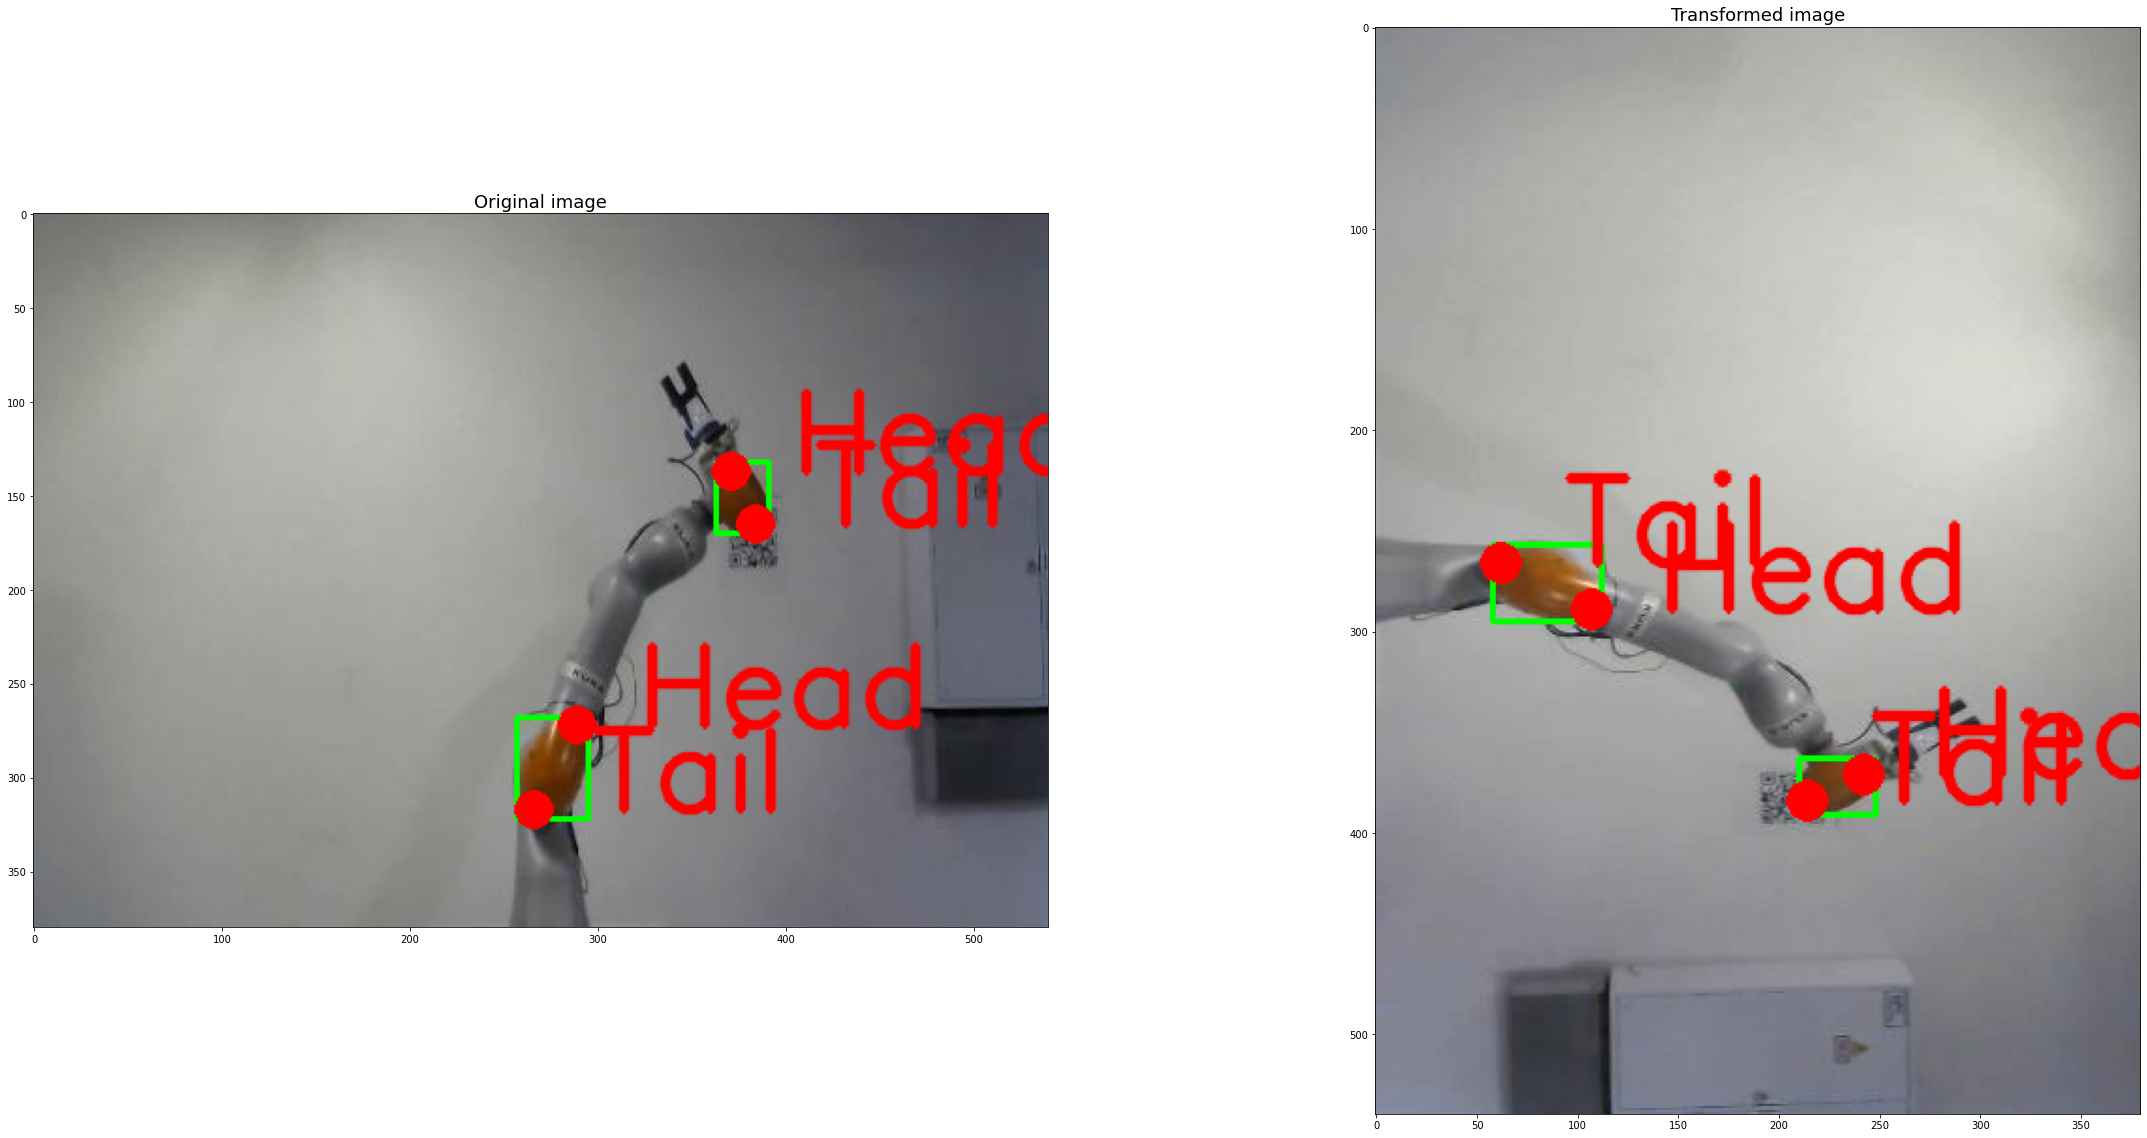

In [ ]:

keypoints_classes_ids2names = {0: 'Head', 1: 'Tail'}

def visualize(image, bboxes, keypoints, image_original=None, bboxes_original=None, keypoints_original=None):
    fontsize = 18

    for bbox in bboxes:
        start_point = (bbox[0], bbox[1])
        end_point = (bbox[2], bbox[3])
        image = cv2.rectangle(image.copy(), start_point, end_point, (0,255,0), 2)
    
    for kps in keypoints:
        for idx, kp in enumerate(kps):
            image = cv2.circle(image.copy(), tuple(kp), 5, (255,0,0), 10)
            image = cv2.putText(image.copy(), " " + keypoints_classes_ids2names[idx], tuple(kp), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,0,0), 3, cv2.LINE_AA)

    if image_original is None and keypoints_original is None:
        plt.figure(figsize=(40,40))
        plt.imshow(image)

    else:
        for bbox in bboxes_original:
            start_point = (bbox[0], bbox[1])
            end_point = (bbox[2], bbox[3])
            image_original = cv2.rectangle(image_original.copy(), start_point, end_point, (0,255,0), 2)
        
        for kps in keypoints_original:
            for idx, kp in enumerate(kps):
                image_original = cv2.circle(image_original, tuple(kp), 5, (255,0,0), 10)
                image_original = cv2.putText(image_original, " " + keypoints_classes_ids2names[idx], tuple(kp), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,0,0), 3, cv2.LINE_AA)

        f, ax = plt.subplots(1, 2, figsize=(40, 20))

        ax[0].imshow(image_original)
        ax[0].set_title('Original image', fontsize=fontsize)

        ax[1].imshow(image)
        ax[1].set_title('Transformed image', fontsize=fontsize)
        
image = (batch[0][0].permute(1,2,0).numpy() * 255).astype(np.uint8)
bboxes = batch[1][0]['boxes'].detach().cpu().numpy().astype(np.int32).tolist()

keypoints = []
for kps in batch[1][0]['keypoints'].detach().cpu().numpy().astype(np.int32).tolist():
    keypoints.append([kp[:2] for kp in kps])

image_original = (batch[2][0].permute(1,2,0).numpy() * 255).astype(np.uint8)
bboxes_original = batch[3][0]['boxes'].detach().cpu().numpy().astype(np.int32).tolist()

keypoints_original = []
for kps in batch[3][0]['keypoints'].detach().cpu().numpy().astype(np.int32).tolist():
    keypoints_original.append([kp[:2] for kp in kps])

visualize(image, bboxes, keypoints, image_original, bboxes_original, keypoints_original)

In [ ]:
def get_model(num_keypoints, weights_path=None):
    
    anchor_generator = AnchorGenerator(sizes=(32, 64, 128, 256, 512), aspect_ratios=(0.25, 0.5, 0.75, 1.0, 2.0, 3.0, 4.0))
    model = torchvision.models.detection.keypointrcnn_resnet50_fpn(pretrained=False,
                                                                   pretrained_backbone=True,
                                                                   num_keypoints=num_keypoints,
                                                                   num_classes = 2, # Background is the first class, object is the second class
                                                                   rpn_anchor_generator=anchor_generator)

    if weights_path:
        state_dict = torch.load(weights_path)
        model.load_state_dict(state_dict)        
        
    return model

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

KEYPOINTS_FOLDER_TRAIN = '/content/train'
KEYPOINTS_FOLDER_TEST = '/content/test'

dataset_train = ClassDataset(KEYPOINTS_FOLDER_TRAIN, transform=train_transform(), demo=False)
dataset_test = ClassDataset(KEYPOINTS_FOLDER_TEST, transform=None, demo=False)

data_loader_train = DataLoader(dataset_train, batch_size=3, shuffle=True, collate_fn=collate_fn)
data_loader_test = DataLoader(dataset_test, batch_size=1, shuffle=False, collate_fn=collate_fn)

model = get_model(num_keypoints = 2)
model.to(device)

params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.001, momentum=0.9, weight_decay=0.0005)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.3)
num_epochs = 50

for epoch in range(num_epochs):
    train_one_epoch(model, optimizer, data_loader_train, device, epoch, print_freq=1000)
    lr_scheduler.step()
    evaluate(model, data_loader_test, device)
    
# Save model weights after training
torch.save(model.state_dict(), '/content/weights')

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained_backbone' is deprecated since 0.13 and will be removed in 0.15, please use 'weights_backbone' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight

  0%|          | 0.00/97.8M [00:00<?, ?B/s]

Epoch: [0]  [ 0/29]  eta: 0:04:32  lr: 0.000037  loss: 9.3754 (9.3754)  loss_classifier: 0.5606 (0.5606)  loss_box_reg: 0.0274 (0.0274)  loss_keypoint: 8.0679 (8.0679)  loss_objectness: 0.6970 (0.6970)  loss_rpn_box_reg: 0.0224 (0.0224)  time: 9.4022  data: 0.0397  max mem: 4198
Epoch: [0]  [28/29]  eta: 0:00:01  lr: 0.001000  loss: 8.8357 (8.9217)  loss_classifier: 0.1894 (0.2948)  loss_box_reg: 0.0444 (0.0477)  loss_keypoint: 7.8619 (7.8842)  loss_objectness: 0.6812 (0.6808)  loss_rpn_box_reg: 0.0118 (0.0142)  time: 0.8213  data: 0.0230  max mem: 4997
Epoch: [0] Total time: 0:00:32 (1.1343 s / it)
creating index...
index created!
Test:  [ 0/20]  eta: 0:00:03  model_time: 0.1621 (0.1621)  evaluator_time: 0.0083 (0.0083)  time: 0.1773  data: 0.0062  max mem: 4997
Test:  [19/20]  eta: 0:00:00  model_time: 0.1646 (0.1683)  evaluator_time: 0.0087 (0.0088)  time: 0.1837  data: 0.0059  max mem: 4997
Test: Total time: 0:00:03 (0.1838 s / it)
Averaged stats: model_time: 0.1646 (0.1683)  evalu

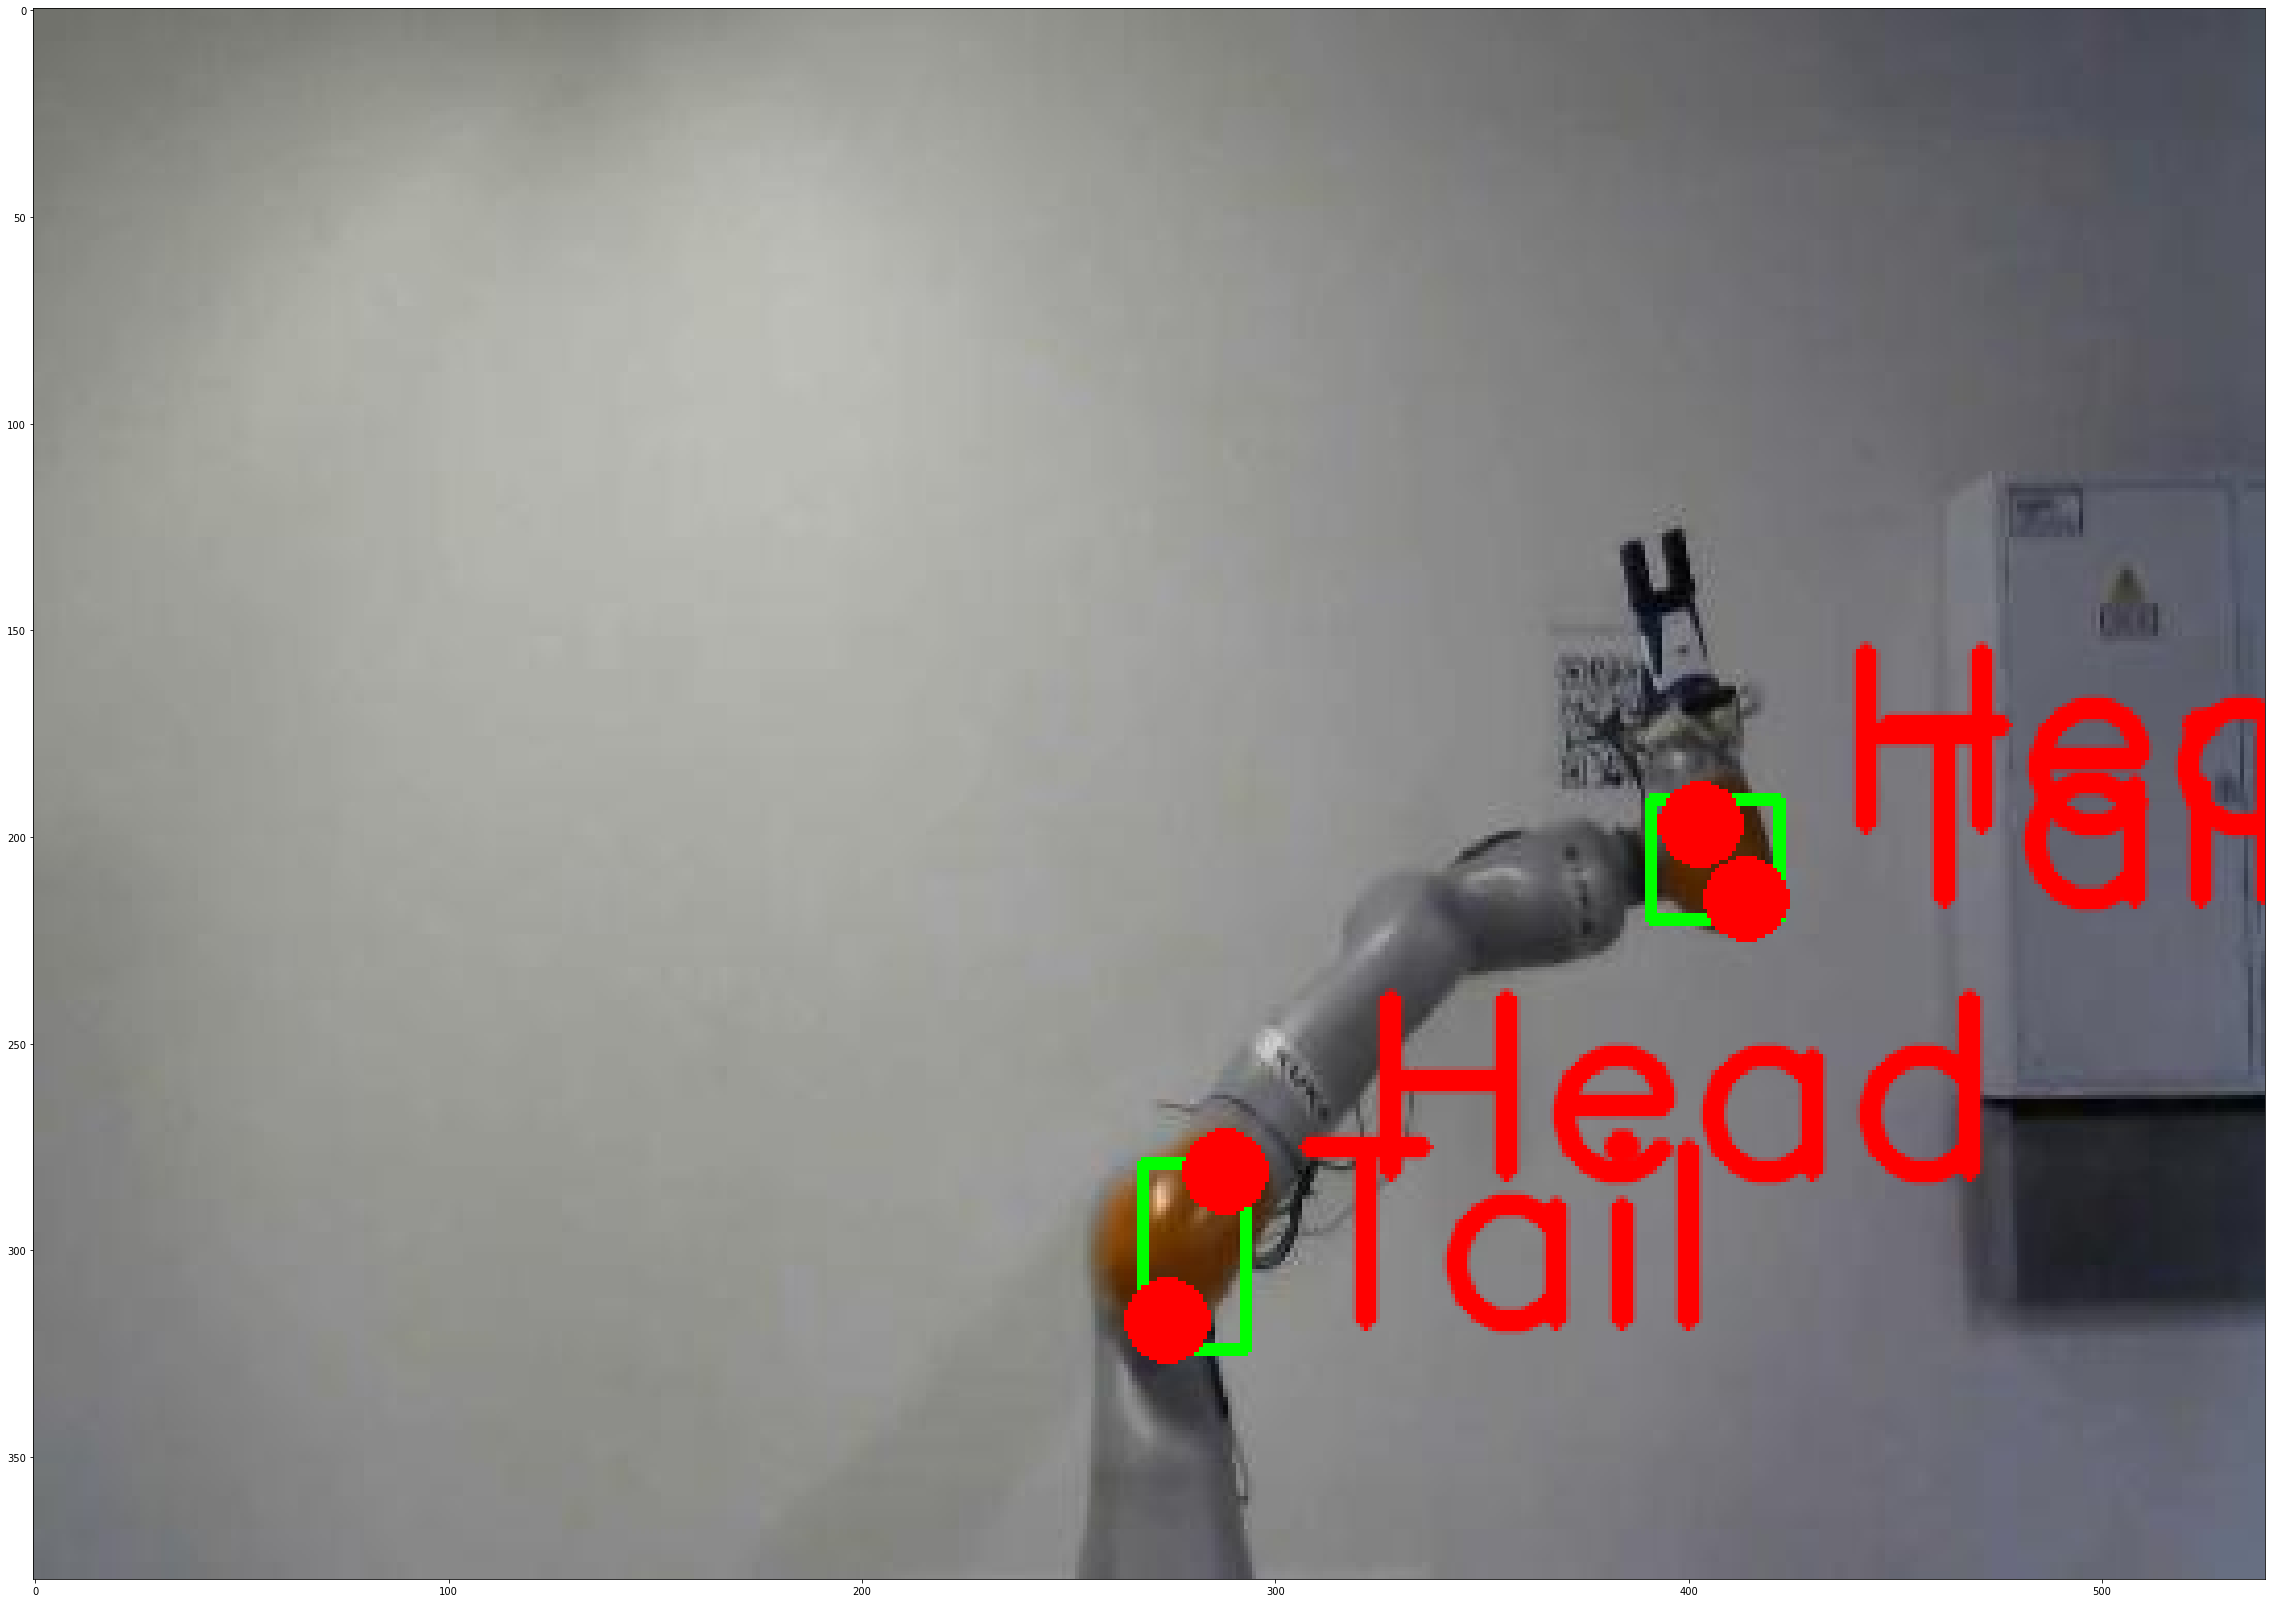

In [ ]:
iterator = iter(data_loader_test)
for _ in range(1):
  images, targets = next(iterator)
images = list(image.to(device) for image in images)

with torch.no_grad():
    model.to(device)
    model.eval()
    output = model(images)

# print("Predictions: \n", output)

image = (images[0].permute(1,2,0).detach().cpu().numpy() * 255).astype(np.uint8)
scores = output[0]['scores'].detach().cpu().numpy()

high_scores_idxs = np.where(scores > 0.2)[0].tolist() # Indexes of boxes with scores > 0.7
post_nms_idxs = torchvision.ops.nms(output[0]['boxes'][high_scores_idxs], output[0]['scores'][high_scores_idxs], 0.1).cpu().numpy() # Indexes of boxes left after applying NMS (iou_threshold=0.3)

# Below, in output[0]['keypoints'][high_scores_idxs][post_nms_idxs] and output[0]['boxes'][high_scores_idxs][post_nms_idxs]
# Firstly, we choose only those objects, which have score above predefined threshold. This is done with choosing elements with [high_scores_idxs] indexes
# Secondly, we choose only those objects, which are left after NMS is applied. This is done with choosing elements with [post_nms_idxs] indexes

keypoints = []
for kps in output[0]['keypoints'][high_scores_idxs][post_nms_idxs].detach().cpu().numpy():
    keypoints.append([list(map(int, kp[:2])) for kp in kps])

bboxes = []
for bbox in output[0]['boxes'][high_scores_idxs][post_nms_idxs].detach().cpu().numpy():
    bboxes.append(list(map(int, bbox.tolist())))
    
visualize(image, bboxes, keypoints)

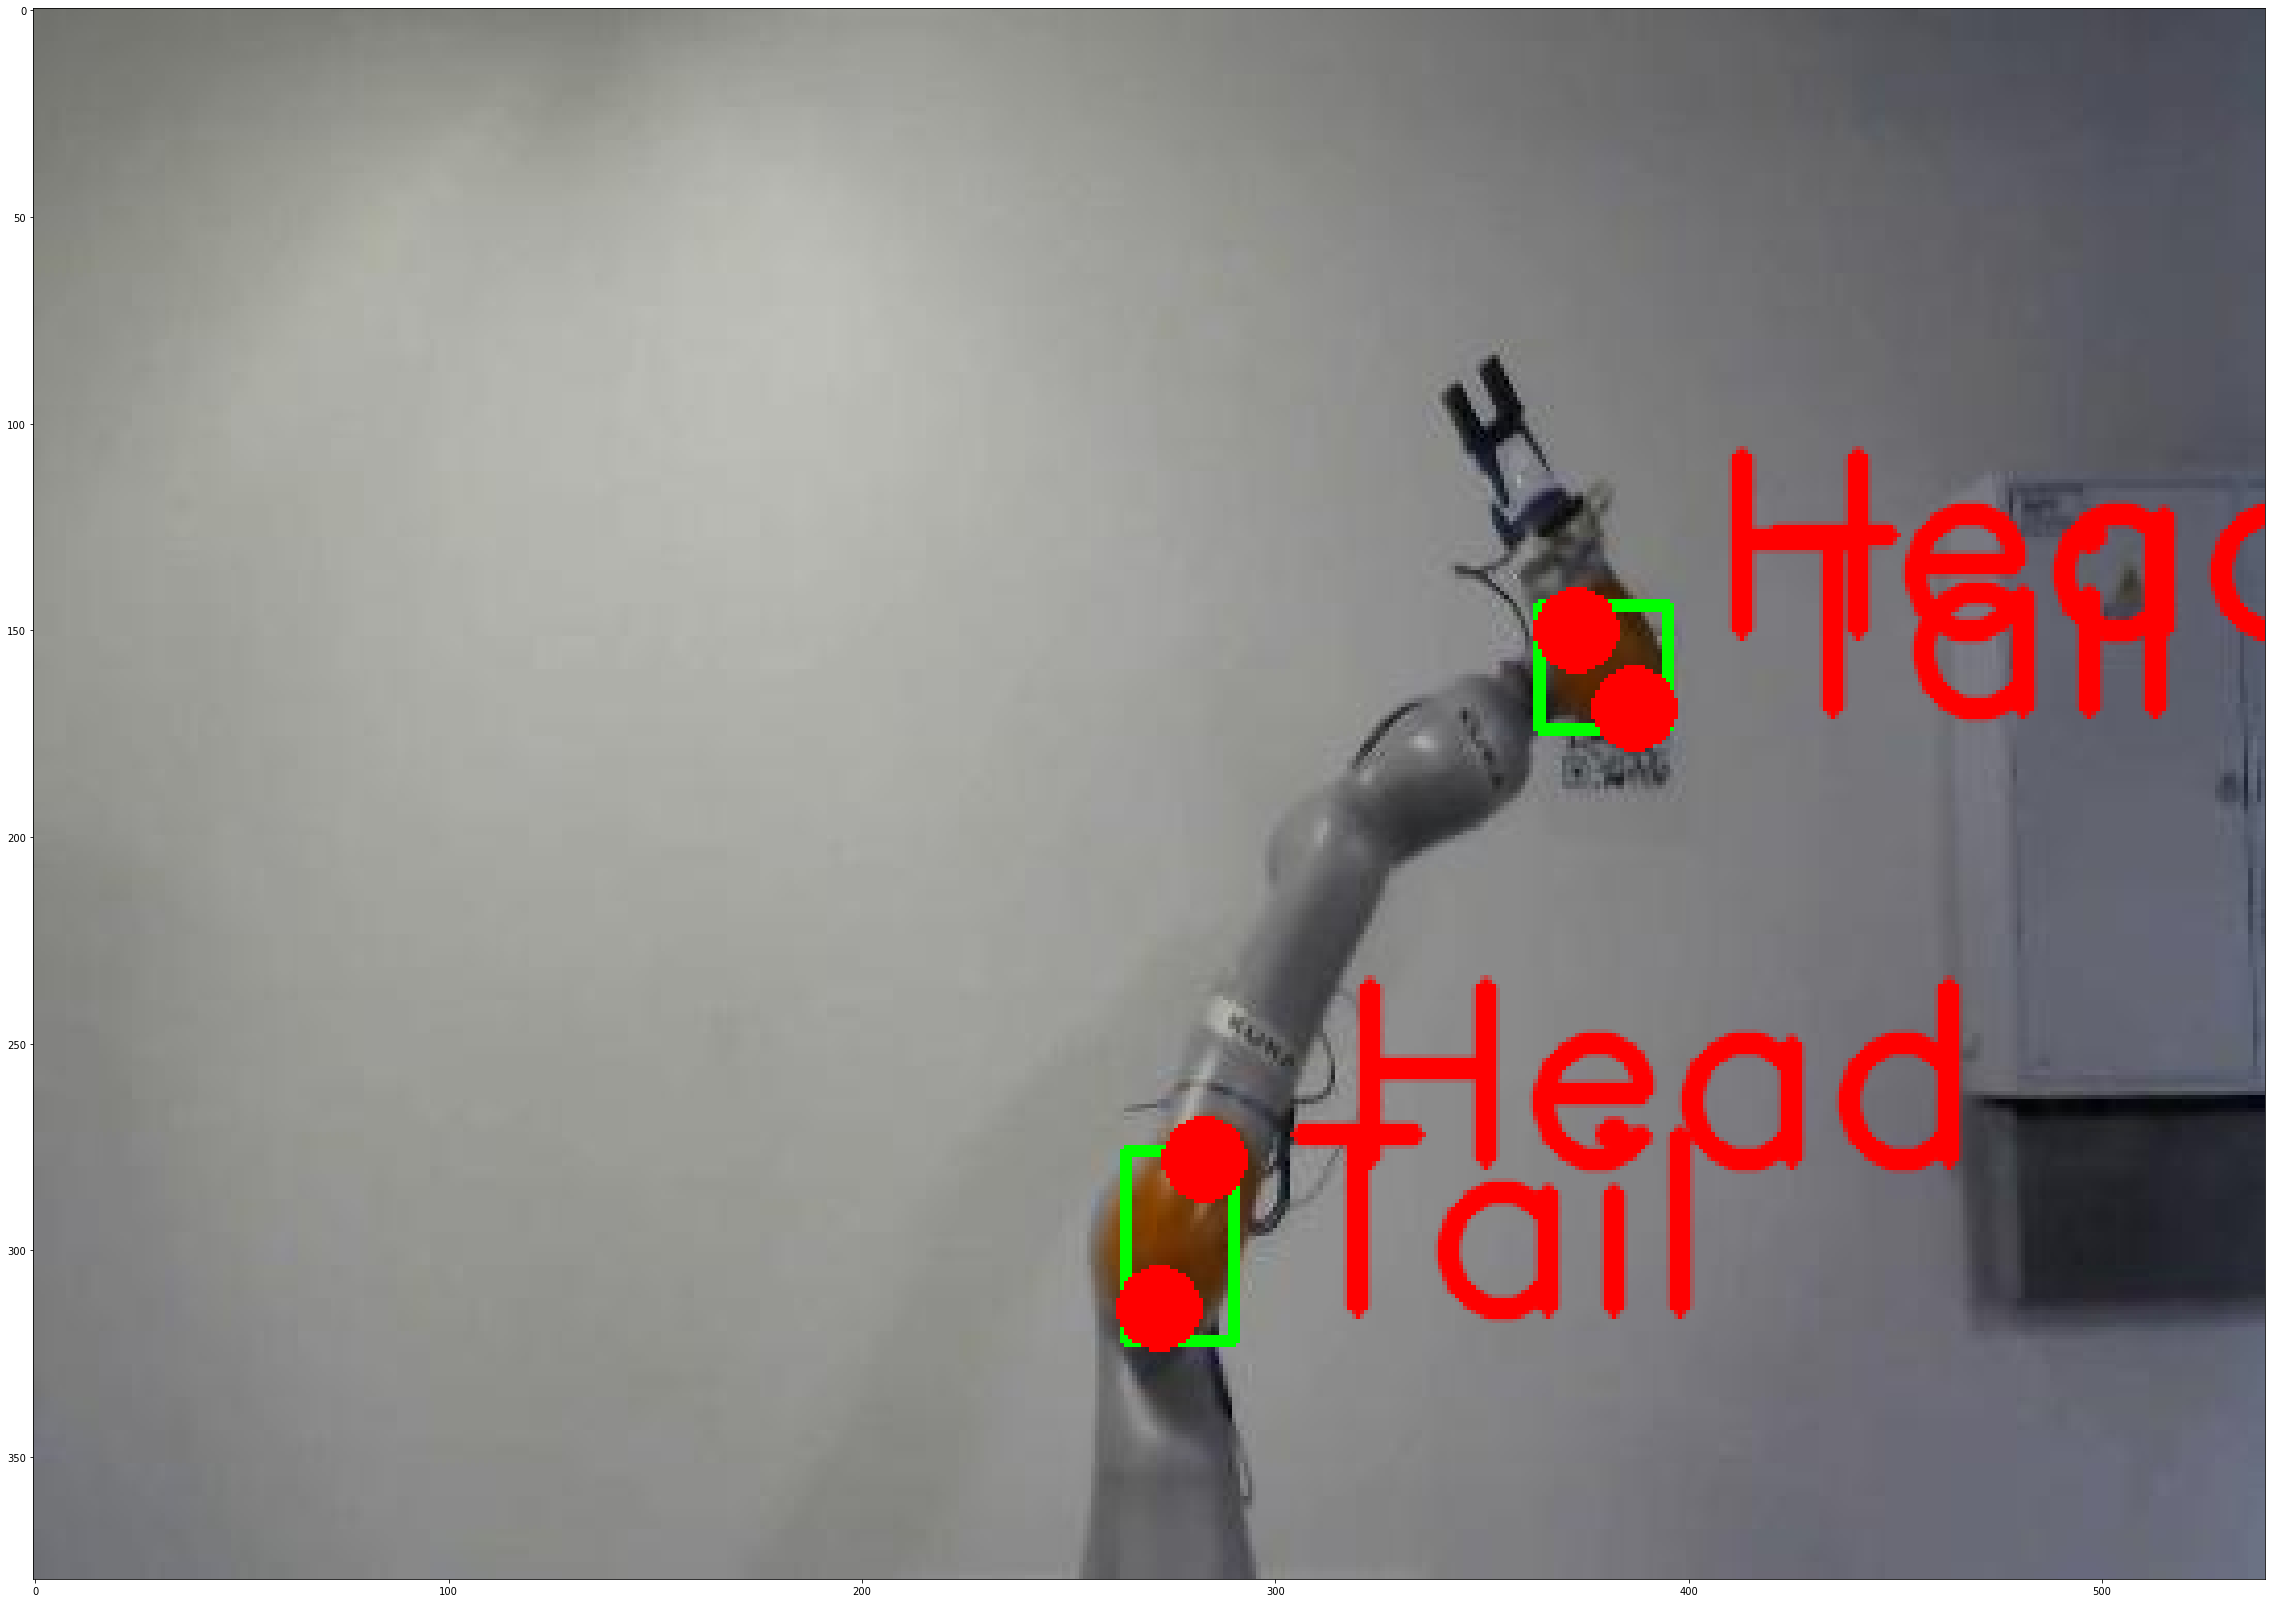

In [ ]:
iterator = iter(data_loader_test)
for _ in range(2):
  images, targets = next(iterator)
images = list(image.to(device) for image in images)

with torch.no_grad():
    model.to(device)
    model.eval()
    output = model(images)

# print("Predictions: \n", output)

image = (images[0].permute(1,2,0).detach().cpu().numpy() * 255).astype(np.uint8)
scores = output[0]['scores'].detach().cpu().numpy()

high_scores_idxs = np.where(scores > 0.2)[0].tolist() # Indexes of boxes with scores > 0.7
post_nms_idxs = torchvision.ops.nms(output[0]['boxes'][high_scores_idxs], output[0]['scores'][high_scores_idxs], 0.1).cpu().numpy() # Indexes of boxes left after applying NMS (iou_threshold=0.3)

# Below, in output[0]['keypoints'][high_scores_idxs][post_nms_idxs] and output[0]['boxes'][high_scores_idxs][post_nms_idxs]
# Firstly, we choose only those objects, which have score above predefined threshold. This is done with choosing elements with [high_scores_idxs] indexes
# Secondly, we choose only those objects, which are left after NMS is applied. This is done with choosing elements with [post_nms_idxs] indexes

keypoints = []
for kps in output[0]['keypoints'][high_scores_idxs][post_nms_idxs].detach().cpu().numpy():
    keypoints.append([list(map(int, kp[:2])) for kp in kps])

bboxes = []
for bbox in output[0]['boxes'][high_scores_idxs][post_nms_idxs].detach().cpu().numpy():
    bboxes.append(list(map(int, bbox.tolist())))
    
visualize(image, bboxes, keypoints)

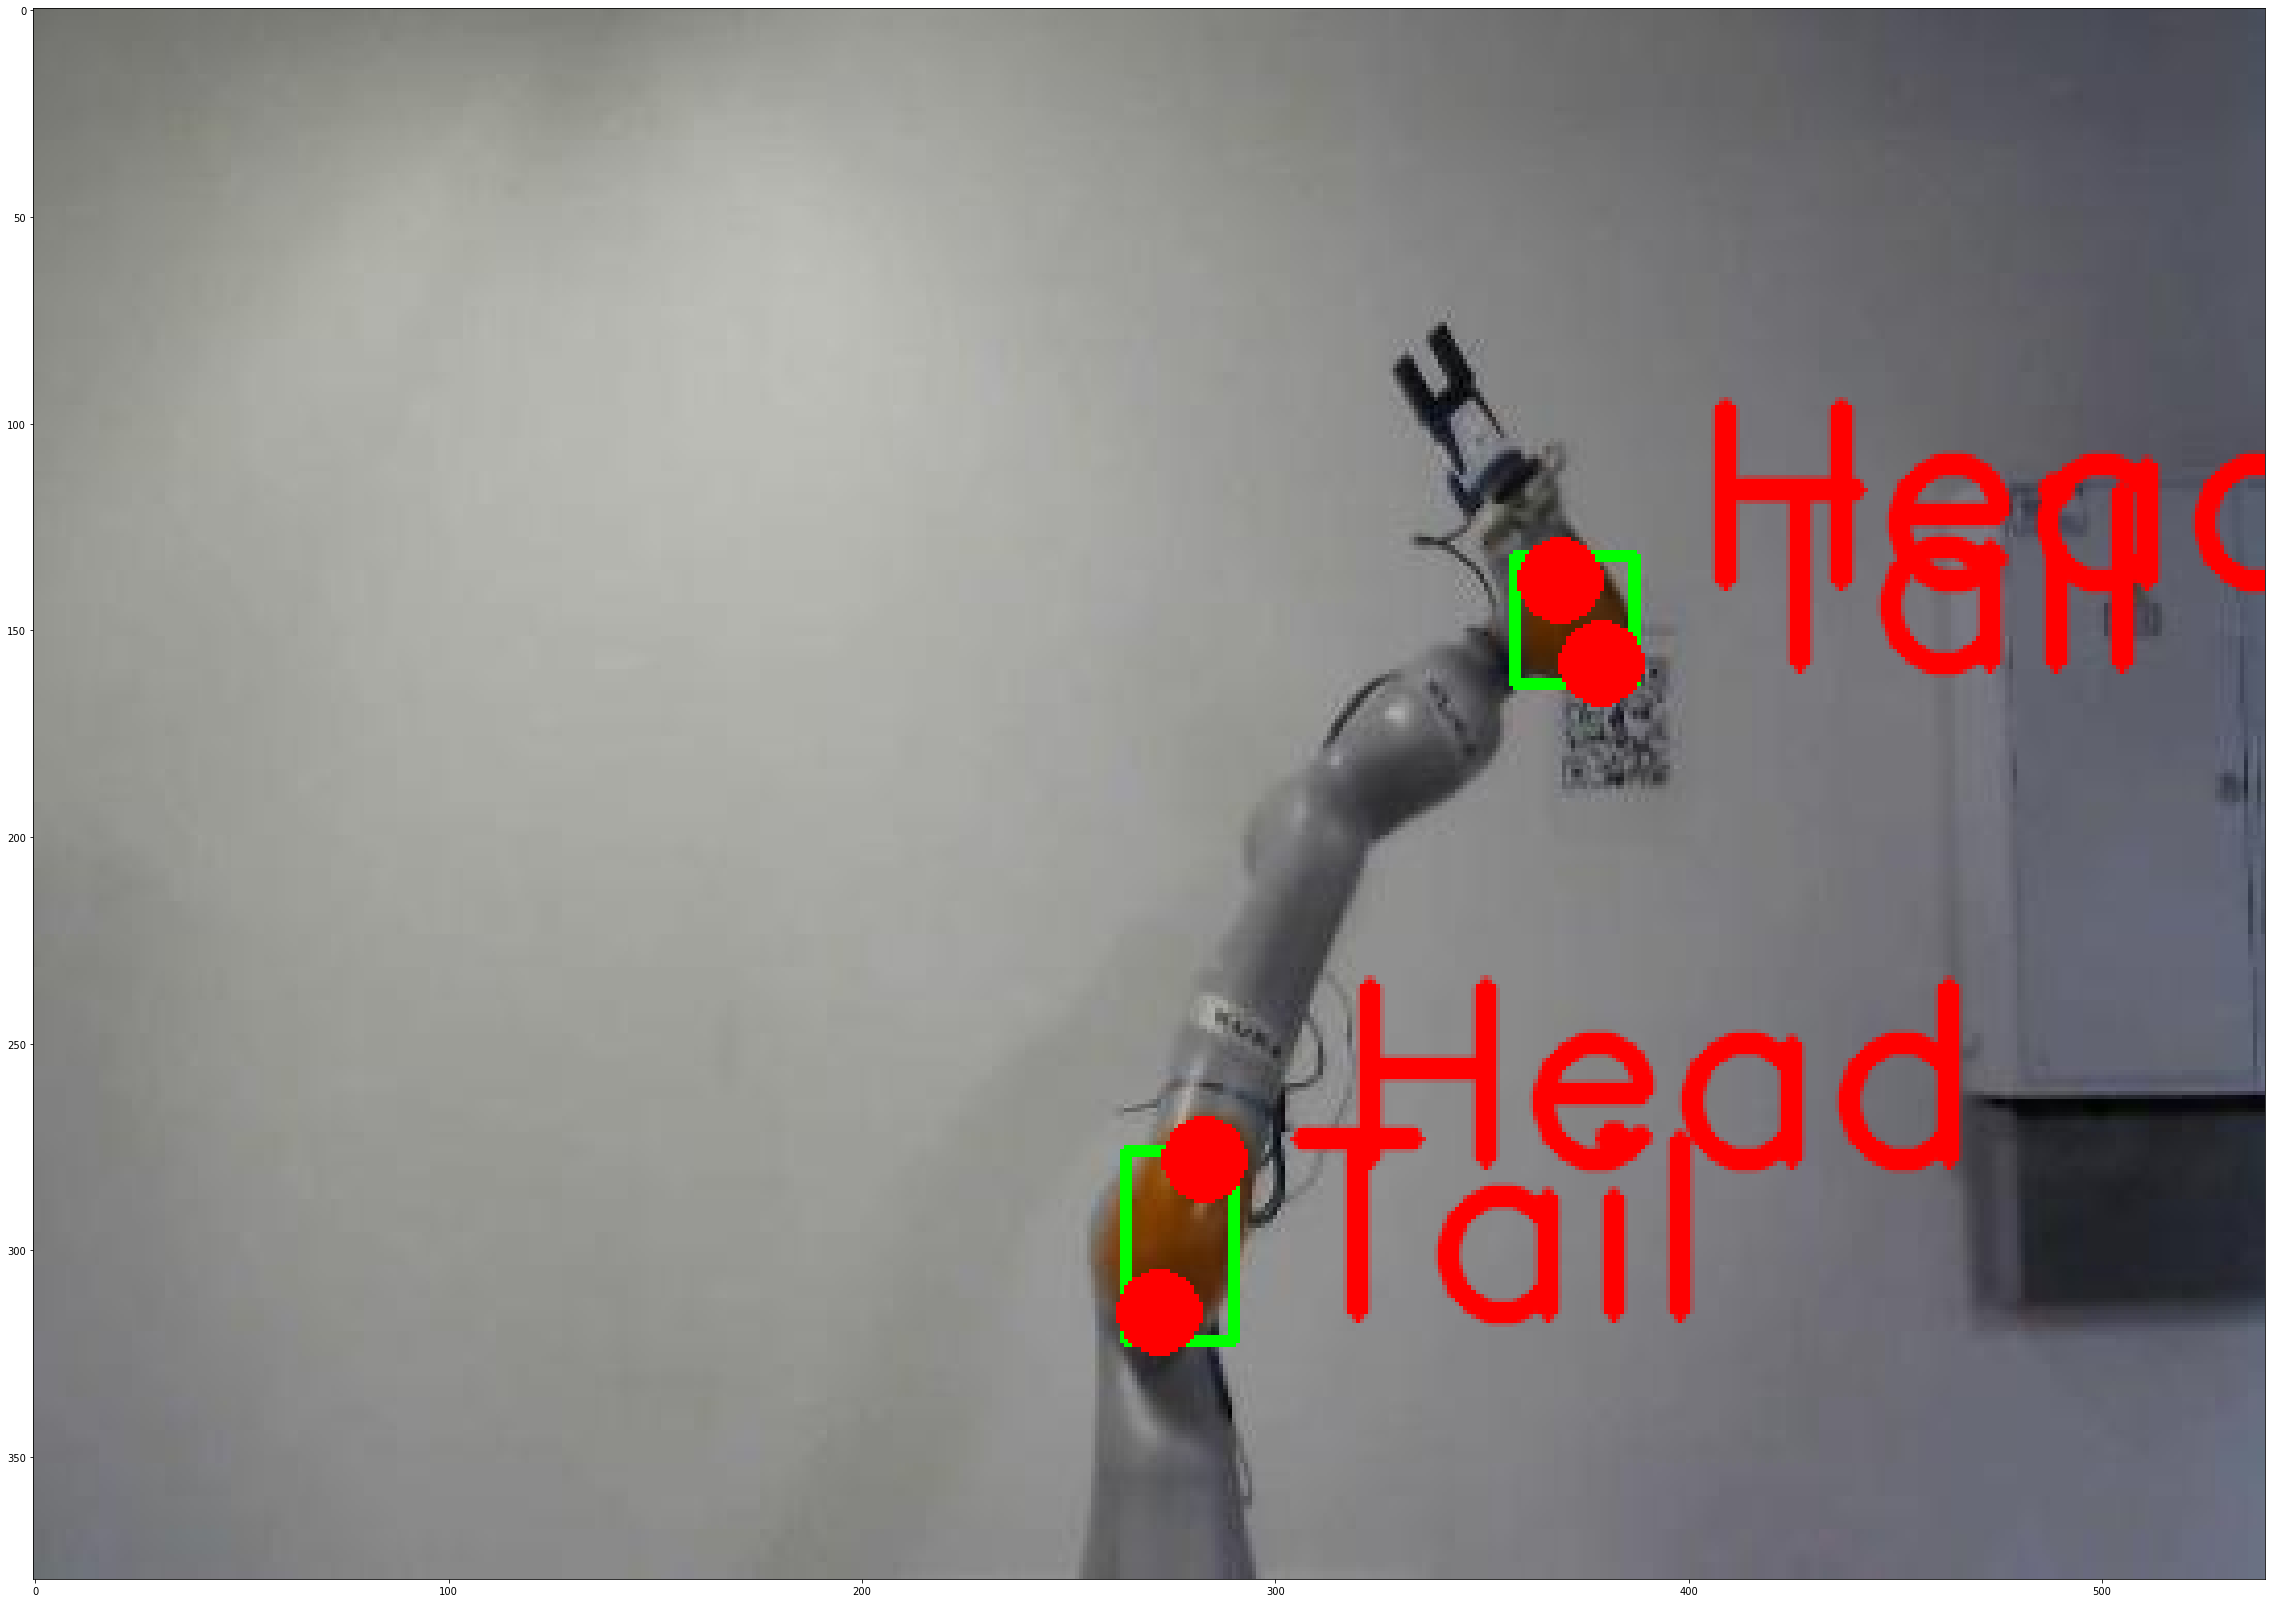

In [ ]:
iterator = iter(data_loader_test)
for _ in range(3):
  images, targets = next(iterator)
images = list(image.to(device) for image in images)

with torch.no_grad():
    model.to(device)
    model.eval()
    output = model(images)

# print("Predictions: \n", output)

image = (images[0].permute(1,2,0).detach().cpu().numpy() * 255).astype(np.uint8)
scores = output[0]['scores'].detach().cpu().numpy()

high_scores_idxs = np.where(scores > 0.2)[0].tolist() # Indexes of boxes with scores > 0.7
post_nms_idxs = torchvision.ops.nms(output[0]['boxes'][high_scores_idxs], output[0]['scores'][high_scores_idxs], 0.1).cpu().numpy() # Indexes of boxes left after applying NMS (iou_threshold=0.3)

# Below, in output[0]['keypoints'][high_scores_idxs][post_nms_idxs] and output[0]['boxes'][high_scores_idxs][post_nms_idxs]
# Firstly, we choose only those objects, which have score above predefined threshold. This is done with choosing elements with [high_scores_idxs] indexes
# Secondly, we choose only those objects, which are left after NMS is applied. This is done with choosing elements with [post_nms_idxs] indexes

keypoints = []
for kps in output[0]['keypoints'][high_scores_idxs][post_nms_idxs].detach().cpu().numpy():
    keypoints.append([list(map(int, kp[:2])) for kp in kps])

bboxes = []
for bbox in output[0]['boxes'][high_scores_idxs][post_nms_idxs].detach().cpu().numpy():
    bboxes.append(list(map(int, bbox.tolist())))
    
visualize(image, bboxes, keypoints)